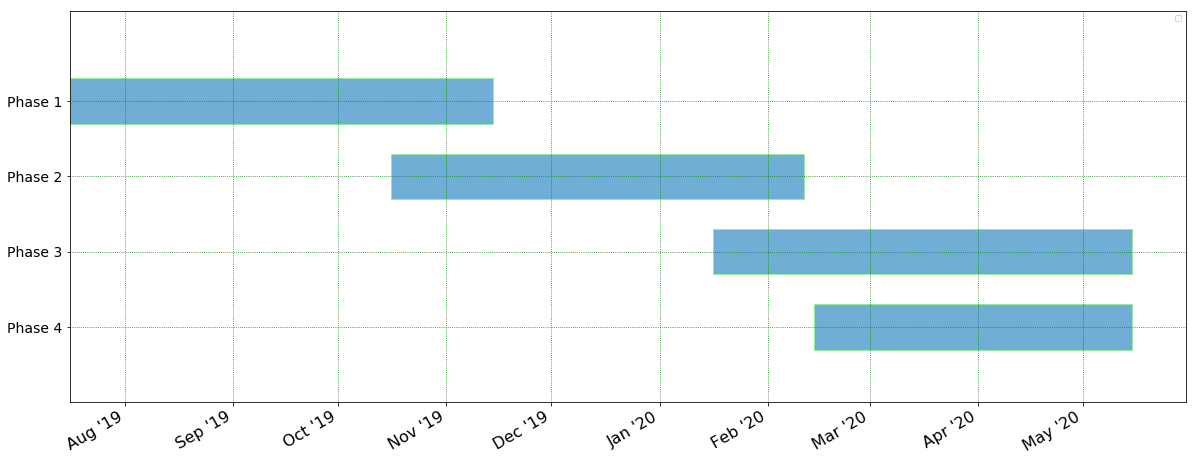

In [69]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.dates
from matplotlib.dates import WEEKLY,MONTHLY, DateFormatter, rrulewrapper, RRuleLocator 
import numpy as np
import matplotlib as mpl

blues = mpl.cm.get_cmap(plt.get_cmap('Blues'))
greens = mpl.cm.get_cmap(plt.get_cmap('Greens'))
reds = mpl.cm.get_cmap(plt.get_cmap('Reds'))
oranges = mpl.cm.get_cmap(plt.get_cmap('Oranges'))
purples = mpl.cm.get_cmap(plt.get_cmap('Purples'))
greys = mpl.cm.get_cmap(plt.get_cmap('Greys'))

def create_date(datetxt):
    day,month,year=datetxt.split('-')
    date = dt.datetime(int(year), int(month), int(day))
    mdate = matplotlib.dates.date2num(date) 
    return mdate
 
def CreateGanttChart():
    """
        Create gantt charts with matplotlib
        Give file name.
    """ 
    
    ylabels = []
    ylabels.append('Phase 1')
    ylabels.append('Phase 2')
    ylabels.append('Phase 3')
    ylabels.append('Phase 4')
    customDates = []
    customDates.append([create_date('01-08-2019'),create_date('30-11-2019')])
    customDates.append([create_date('01-11-2019'),create_date('27-2-2020')])
    customDates.append([create_date('01-02-2020'),create_date('31-5-2020')])
    customDates.append([create_date('01-03-2020'),create_date('31-5-2020')])   
    ilen=len(ylabels)
    pos = np.arange(0.5,ilen*0.5+0.5,0.5)
    task_dates = {}
    for i,task in enumerate(ylabels):
        task_dates[task] = customDates[i]
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    for i in range(len(ylabels)):
        start_date,end_date = task_dates[ylabels[i]]
        ax.barh((i*0.5)+0.5, end_date - start_date, left=start_date, height=0.3, align='center', edgecolor='lightgreen', color=blues(150), alpha = 0.8)
    locsy, labelsy = plt.yticks(pos,ylabels)
    plt.setp(labelsy, fontsize = 14)
#    ax.axis('tight')
    ax.set_ylim(ymin = -0.1, ymax = ilen*0.5+0.5)
    ax.grid(color = 'g', linestyle = ':')
    ax.xaxis_date()
    rule = rrulewrapper(MONTHLY, interval=1)
    loc = RRuleLocator(rule)
    formatter = DateFormatter("%b '%y")
    #formatter = DateFormatter("%d-%b")
  
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(formatter)
    labelsx = ax.get_xticklabels()
    plt.setp(labelsx, rotation=30, fontsize=16)
 
    font = font_manager.FontProperties(size='small')
    ax.legend(loc=1,prop=font)
 
    ax.invert_yaxis()
    fig.autofmt_xdate()
    
    if fname:
        fig.savefig('stage_0_execution_time.pdf',dpi=800,bbox_inches='tight')

CreateGanttChart()

In [63]:
labelsx

<a list of 12 Text xticklabel objects>